# PLOT XYZ

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_name = 'gaus_raman.csv'
df = pd.read_csv(file_name)
df = df.replace(np.nan,0)

frequencies = df.loc[:,'freq'].to_numpy() 
I = df.loc[:,'activity'].to_numpy()
ix = df.loc[:,'activity_x'].to_numpy()
iy = df.loc[:,'activity_y'].to_numpy()
iz = df.loc[:,'activity_z'].to_numpy()

In [11]:
peak_width = 5  # Adjust the width of the Gaussian peaks

# Create an array of x values (frequencies)
x = np.linspace(0, max(frequencies) + 100, 3000)

# Initialize an array for the spectrum
spI = np.zeros_like(x)
spx = np.zeros_like(x)
spy = np.zeros_like(x)
spz = np.zeros_like(x)

# Add Gaussian-shaped peaks to the spectrum
for freq, intI, intx, inty, intz in zip(frequencies, I,  ix, iy, iz):
    spI += intI * np.exp(-(x - freq) ** 2 / (2 * peak_width ** 2))
    spx += intx * np.exp(-(x - freq) ** 2 / (2 * peak_width ** 2))
    spy += inty * np.exp(-(x - freq) ** 2 / (2 * peak_width ** 2))
    spz += intz * np.exp(-(x - freq) ** 2 / (2 * peak_width ** 2))

SP = np.concatenate((spx.T, spy.T, spz.T))

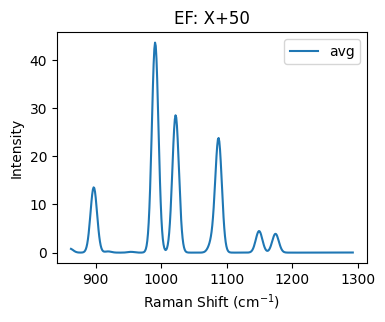

In [13]:
# create the plot
plt.figure(figsize=(4,3))
plt.plot(x[800:1200], spI[800:1200], label='avg')
plt.xlabel('Raman Shift (cm$^{-1}$)')
plt.ylabel('Intensity')
plt.title('EF: X+50')
plt.legend()
plt.show()

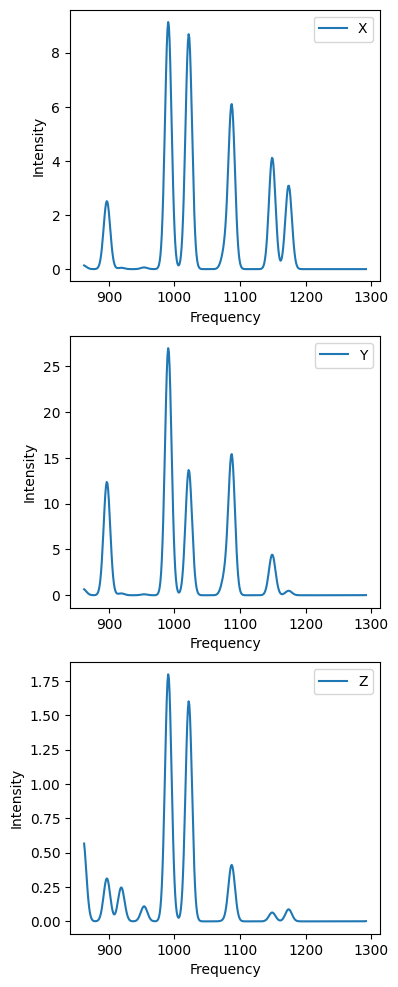

In [7]:
# Create the plot
plt.figure(figsize=(4,12))
plt.subplot(3,1,1)
plt.plot(x[800:1200], spx[800:1200], label='X')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.legend()
plt.subplot(3,1,2)
plt.plot(x[800:1200], spy[800:1200], label='Y')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.legend()
plt.subplot(3,1,3)
plt.plot(x[800:1200], spz[800:1200], label='Z')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.legend()
plt.show()

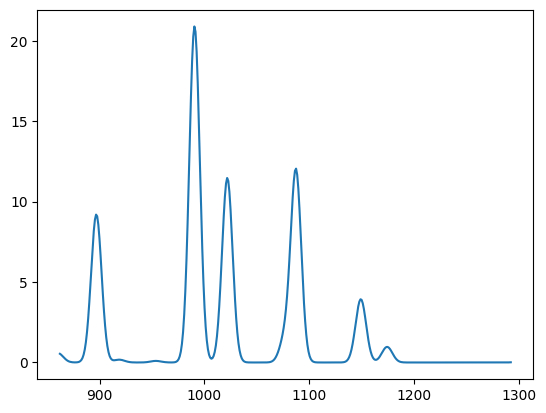

In [14]:
combo = 0.2*spx + 0.7*spy + 0.1*spz
plt.plot(x[800:1200], combo[800:1200])